In [3]:
import IPython
from IPython.display import clear_output

# Install ipywidgets
!pip install ipywidgets

# Clear the output
clear_output()

# Confirmation message
print("ipywidgets installed successfully!")


ipywidgets installed successfully!


In [4]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt


In [5]:
# Define your dataset file paths
dataset_files = {
    'Dataset 1': 'datasets/athenry.csv',
    'Dataset 2': 'datasets/rochespoint.csv'
}

# Create a dropdown menu
dropdown = widgets.Dropdown(
    options=dataset_files,
    description='Select Dataset:',
    disabled=False,
)

# Create an output widget
output = widgets.Output()

# Define a global variable to hold the selected dataset
selected_df = None

# Function to load and analyze the selected dataset
def load_and_analyze_dataset(change):
    global selected_df
    selected_dataset = dropdown.value
    try:
        # Read the CSV file, skipping the first 24 rows
        df = pd.read_csv(selected_dataset, skiprows=24)
        selected_df = df  # Update the global variable
        
        with output:
            # Clear the output to remove previous plots
            clear_output(wait=True)
            
            # Display the first few rows of the dataset
            display(df.head())

            # Add your analysis scripts here
            # For example, describe the dataset
            display(df.describe())

    except pd.errors.ParserError as e:
        with output:
            clear_output(wait=True)
            print(f"Error parsing {selected_dataset}: {e}")

# Attach the function to the dropdown menu
dropdown.observe(load_and_analyze_dataset, names='value')

# Display the dropdown menu and output widget
display(dropdown)
display(output)

# Initial call to display the first dataset
load_and_analyze_dataset(None)


Dropdown(description='Select Dataset:', options={'Dataset 1': 'datasets/athenry.csv', 'Dataset 2': 'datasets/r…

Output()

In [6]:
# Function to plot the maximum air temperature over time
def plot_max_temperature():
    global selected_df
    if selected_df is not None:
        df = selected_df.copy()
        df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y')
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['maxtp'], label='Max Temperature (C)')
        plt.xlabel('Date')
        plt.ylabel('Max Temperature (C)')
        plt.title('Maximum Air Temperature Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No dataset selected.")


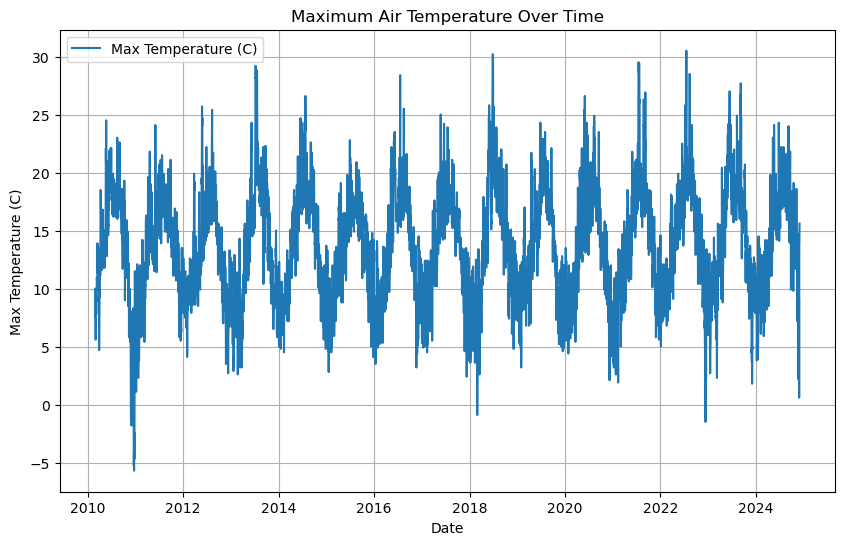

In [7]:
# Call the plot function
plot_max_temperature()

# Add more calls to other analysis/plotting functions here
# e.g., plot_min_temperature(), plot_rainfall(), etc.


In [8]:
"""""
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Define your dataset file paths
dataset_files = {
    'Dataset 1': 'datasets/athenry.csv',
    'Dataset 2': 'datasets/rochespoint.csv'
}

# Create a dropdown menu
dropdown = widgets.Dropdown(
    options=dataset_files,
    description='Select Dataset:',
    disabled=False,
)

# Create an output widget
output = widgets.Output()

# Function to load, analyze, and plot the selected dataset
def load_and_analyze_dataset(change):
    selected_dataset = dropdown.value
    try:
        # Read the CSV file, skipping the first 24 rows
        df = pd.read_csv(selected_dataset, skiprows=24)
        
        with output:
            # Clear the output to remove previous plots
            clear_output(wait=True)
            
            # Display the first few rows of the dataset
            display(df.head())

            # Add your analysis scripts here
            # For example, describe the dataset
            display(df.describe())
            
            # Plot the maximum air temperature over time
            df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y')
            plt.figure(figsize=(10, 6))
            plt.plot(df['date'], df['maxtp'], label='Max Temperature (C)')
            plt.xlabel('Date')
            plt.ylabel('Max Temperature (C)')
            plt.title('Maximum Air Temperature Over Time')
            plt.legend()
            plt.grid(True)
            plt.show()

    except pd.errors.ParserError as e:
        with output:
            clear_output(wait=True)
            print(f"Error parsing {selected_dataset}: {e}")

# Attach the function to the dropdown menu
dropdown.observe(load_and_analyze_dataset, names='value')

# Display the dropdown menu and output widget
display(dropdown)
display(output)

# Initial call to display the first dataset
load_and_analyze_dataset(None)


SyntaxError: incomplete input (3287132381.py, line 1)